In [ ]:

#Importing the required libraries
import pandas as pd # type: ignore
import matplotlib.pyplot as plt 
import seaborn as sns # type: ignore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression as LR

In [312]:
#Reading the input dataset
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [313]:
#Checking the basic info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [314]:
#checking for any missing values
print(df.isnull().sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [315]:
df.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [316]:
#Encoding the categorical salary column with ordinal encoder because there is a logical relationship in the columns data
ord_encoder=OrdinalEncoder(categories=[['low','medium','high']])
encoded_salary=ord_encoder.fit_transform(df[['salary']])
encoded_salary_df=pd.DataFrame(encoded_salary,columns=['encoded_salary'])


In [317]:
encoded_salary_df

,encoded_salary
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
14994,0.0
14995,0.0
14996,0.0
14997,0.0


In [318]:
df=pd.concat([df,encoded_salary_df],axis=1)
df.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,encoded_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.0
5,0.41,0.50,2,153,3,0,1,0,sales,low,0.0
6,0.10,0.77,6,247,4,0,1,0,sales,low,0.0
7,0.92,0.85,5,259,5,0,1,0,sales,low,0.0
8,0.89,1.00,5,224,5,0,1,0,sales,low,0.0
9,0.42,0.53,2,142,3,0,1,0,sales,low,0.0


In [319]:
#Encoding the categorical 'Department' Column using the OneHotEncoder because there is no logical relationship
#among the data and hence binary encoding is needed and drop first was used to avoid multicolinearity problem
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(sparse_output=False)
encoded_dept=OHE.fit_transform(df[['Department']])
encoded_dept_df=pd.DataFrame(encoded_dept,columns=OHE.get_feature_names_out(['Department']))
df=pd.concat([df,encoded_dept_df],axis=1)
df.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.89,1.00,5,224,5,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.42,0.53,2,142,3,0,1,0,sales,low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [320]:
numeric_df=df.drop(columns=['salary','Department'])
numeric_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,encoded_salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


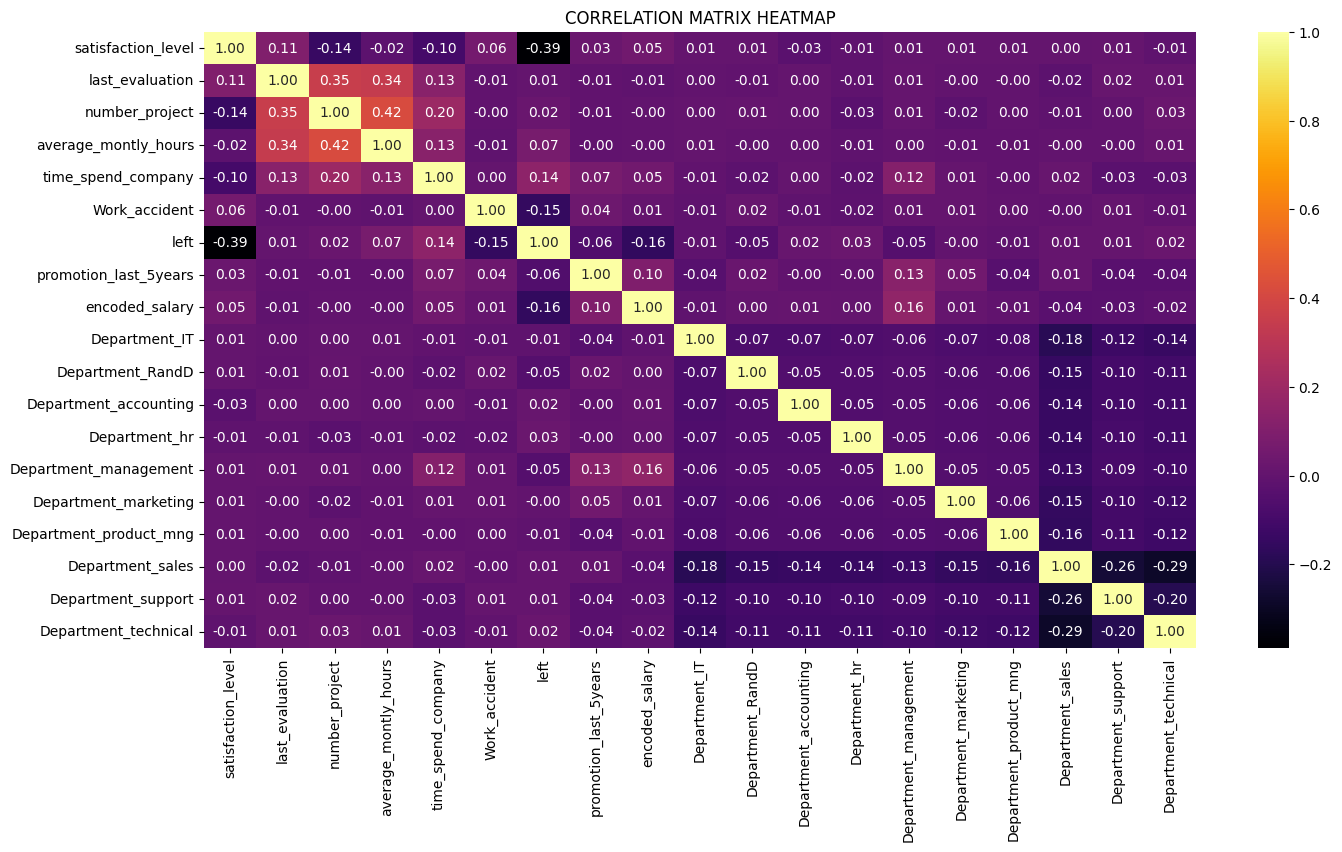

In [321]:
#Usiing the correlation heatmap to analyze the effect of different variables on the target variable which is "left"
correlation_matrix=numeric_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix,annot=True,cmap="inferno",fmt='.2f')
plt.title("CORRELATION MATRIX HEATMAP")
plt.show()

In [322]:
#Extracting correlation variables with the 'left; variable
correlation_with_left = correlation_matrix['left']
# Filter the correlations (positive or negative) that are significant (threshold can be adjusted)
# Here, I will display values with absolute correlation greater than a threshold of 0.1
threshold=0.1
significant_correlations = correlation_with_left[abs(correlation_with_left)>threshold]
# Print the features that have direct impact on 'left' with their correlation values
for feature ,correlation_value in significant_correlations.items():
    if feature != 'left':             # We don't need to print the correlation of 'left' with itself
        if correlation_value > 0:
            print(f"{feature} has a positive correlation ({correlation_value:.2f}) with 'left'.")
        else:
            print(f"{feature} has a neagtive correlation ({correlation_value:.2f}) with 'left'.")



satisfaction_level has a neagtive correlation (-0.39) with 'left'.
time_spend_company has a positive correlation (0.14) with 'left'.
Work_accident has a neagtive correlation (-0.15) with 'left'.
encoded_salary has a neagtive correlation (-0.16) with 'left'.


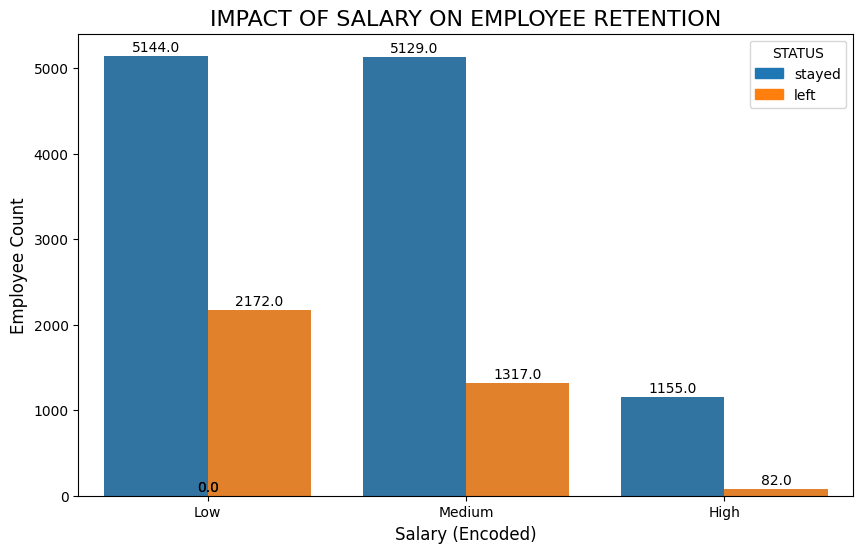

In [323]:
# Impact of salary on employee retention
import matplotlib.patches as mpatches
plt.figure(figsize=(10,6))
ax=sns.countplot(data=numeric_df, x='encoded_salary', hue='left')
plt.title("IMPACT OF SALARY ON EMPLOYEE RETENTION", fontsize=16)
plt.xlabel("Salary (Encoded)", fontsize=12)
plt.ylabel("Employee Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
legend_handles=[mpatches.Patch(color=sns.color_palette()[0],label='stayed'),mpatches.Patch(color=sns.color_palette()[1],label='left')]

#ADDING ANNOTATIONS TO ALL THE BARS IN THE PLOT BY LOOPING THROUGH EACH BAR

for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.1f}', xy=(p.get_x() + (p.get_width() / 2), height), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')
plt.legend(handles=legend_handles, title='STATUS', loc='upper right')
plt.show()

In [324]:
numeric_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'encoded_salary', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical'],
      dtype='object')

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3789319469.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3789319469.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3789319469.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3789319469.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3789319469.py:45: FutureWarning:



Passing `pal

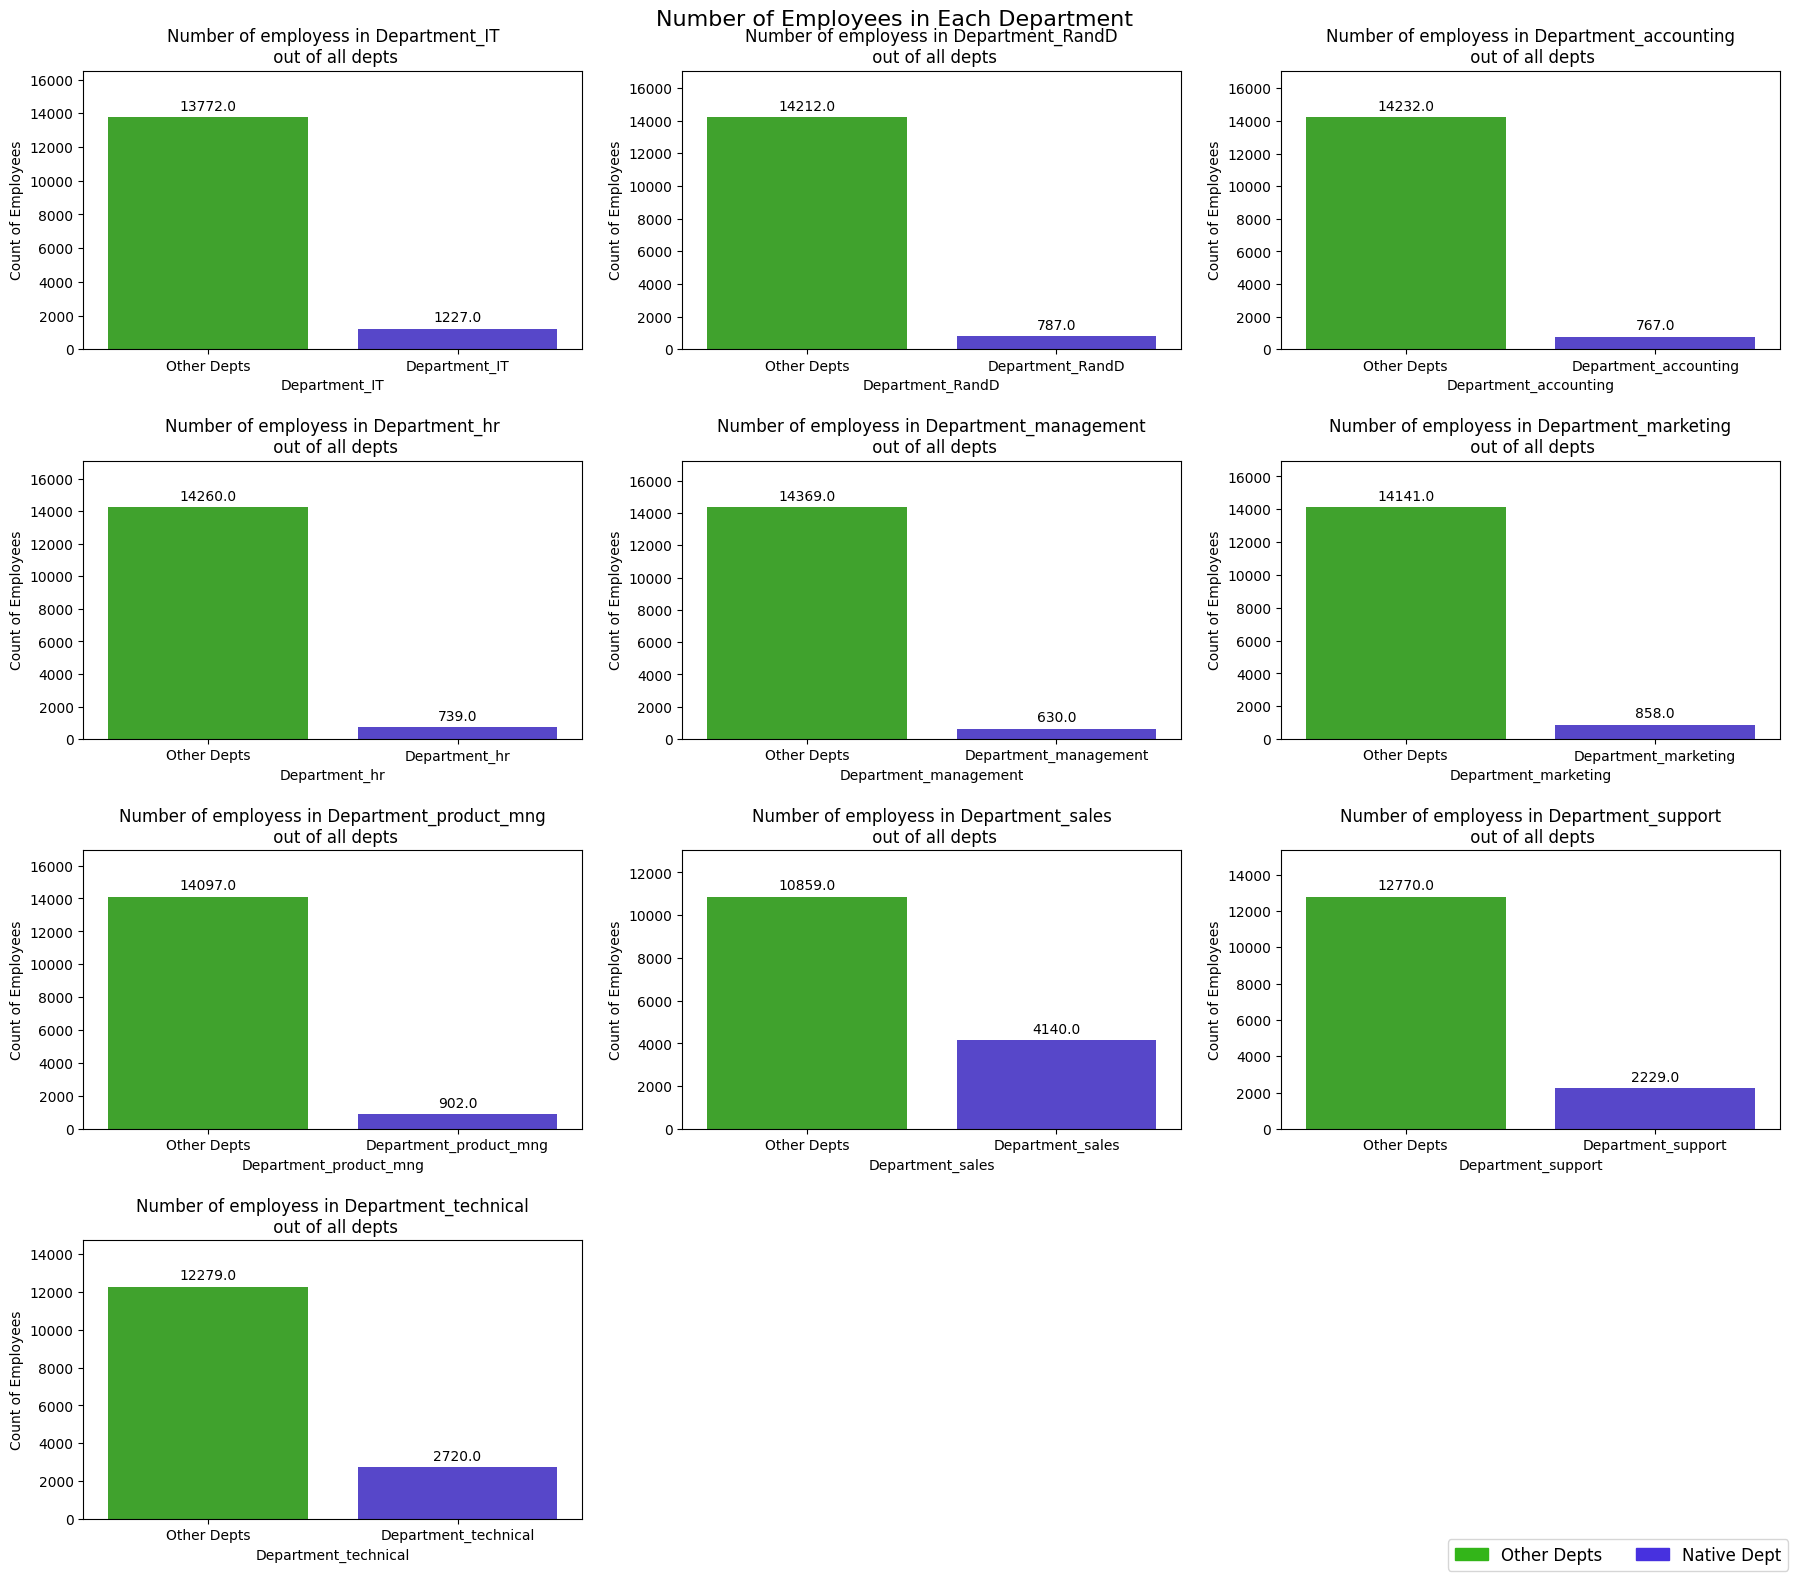

In [325]:
import numpy as np
from matplotlib.colors import to_hex
# Assuming 'df' now contains the one-hot encoded department columns
# List of one-hot encoded department columns
department_columns= [col for col in numeric_df.columns if col.startswith('Department_')]

#check if department column is empty
if not department_columns:
    raise ValueError("No department columns found in the DataFrame")

# Dynamically calculate the number of rows and columns needed for the subplots
num_depts=len(department_columns)
num_cols=3
num_rows=(len(department_columns)+num_cols-1)//num_cols

#check if num_rows is valid
if num_rows <=0:
    raise ValueError("Invalid number of rows calculated")


def generate_distinct_colors():
    def random_color():
        return np.random.rand(3,)
    color1=random_color()
    color2=random_color()
    while np.linalg.norm(color1-color2)< 0.6:
        color2=random_color()
    return to_hex(color1),to_hex(color2)
#Generate two distinct colors 
native_color,other_color=generate_distinct_colors()

# Now we have to create the subplots and dynammically arrange them and set the figure size
fig,axes = plt.subplots(num_rows,num_cols,figsize=(18,4*num_rows))


# Now we have to flatten the axes to make it easier to iterate over them
# The axes is a 2D array which was returened we called plt.subplots

axes=axes.flatten()

# Now we have to iterate over each departments and plot the count of employees in each department

for idx,dept_col in enumerate(department_columns):
    ax =axes[idx]
    bars=sns.countplot(data=numeric_df,x= dept_col, ax=axes[idx],palette={'0.0':other_color,'1.0':native_color})
    ax.set_title(f'Number of employess in {dept_col}\n out of all depts',fontsize=12)
    ax.set_ylabel('Count of Employees',fontsize=10)
    ax.set_xticklabels(['Other Depts',dept_col])
    # setting the y-axis to log scale to make the plot more readable
    for bar in ax.patches:
        height=bar.get_height()
        ax.annotate(f'{height:.1f}',xy=((bar.get_x()+bar.get_width()/2),height),xytext=(0,3),textcoords='offset points',ha='center',va='bottom')
  
# Now we have to remove the empty subplots
for idx in range (len(department_columns),len(axes)):
    fig.delaxes(axes[idx])
for ax in axes[:len(department_columns)]:  # Only adjust subplots that have data
    subplot_max = max([bar.get_height() for bar in ax.patches])  # Find max height for this subplot
    ax.set_ylim(0, subplot_max * 1.2)
#Now we have to make a custom legend for the figure to make it more readable

import matplotlib.patches as mpatches

legend_handles=[mpatches.Patch(color=other_color,label="Other Depts"),mpatches.Patch(color=native_color,label='Native Dept')]
fig.legend(handles=legend_handles, loc='lower right', ncol=2, fontsize=12)
fig.suptitle("Number of Employees in Each Department", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4,wspace=0.2)
plt.show()

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3047856476.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3047856476.py:60: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3047856476.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3047856476.py:60: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\3047856476.py:57: FutureWarning:



Passing `pal

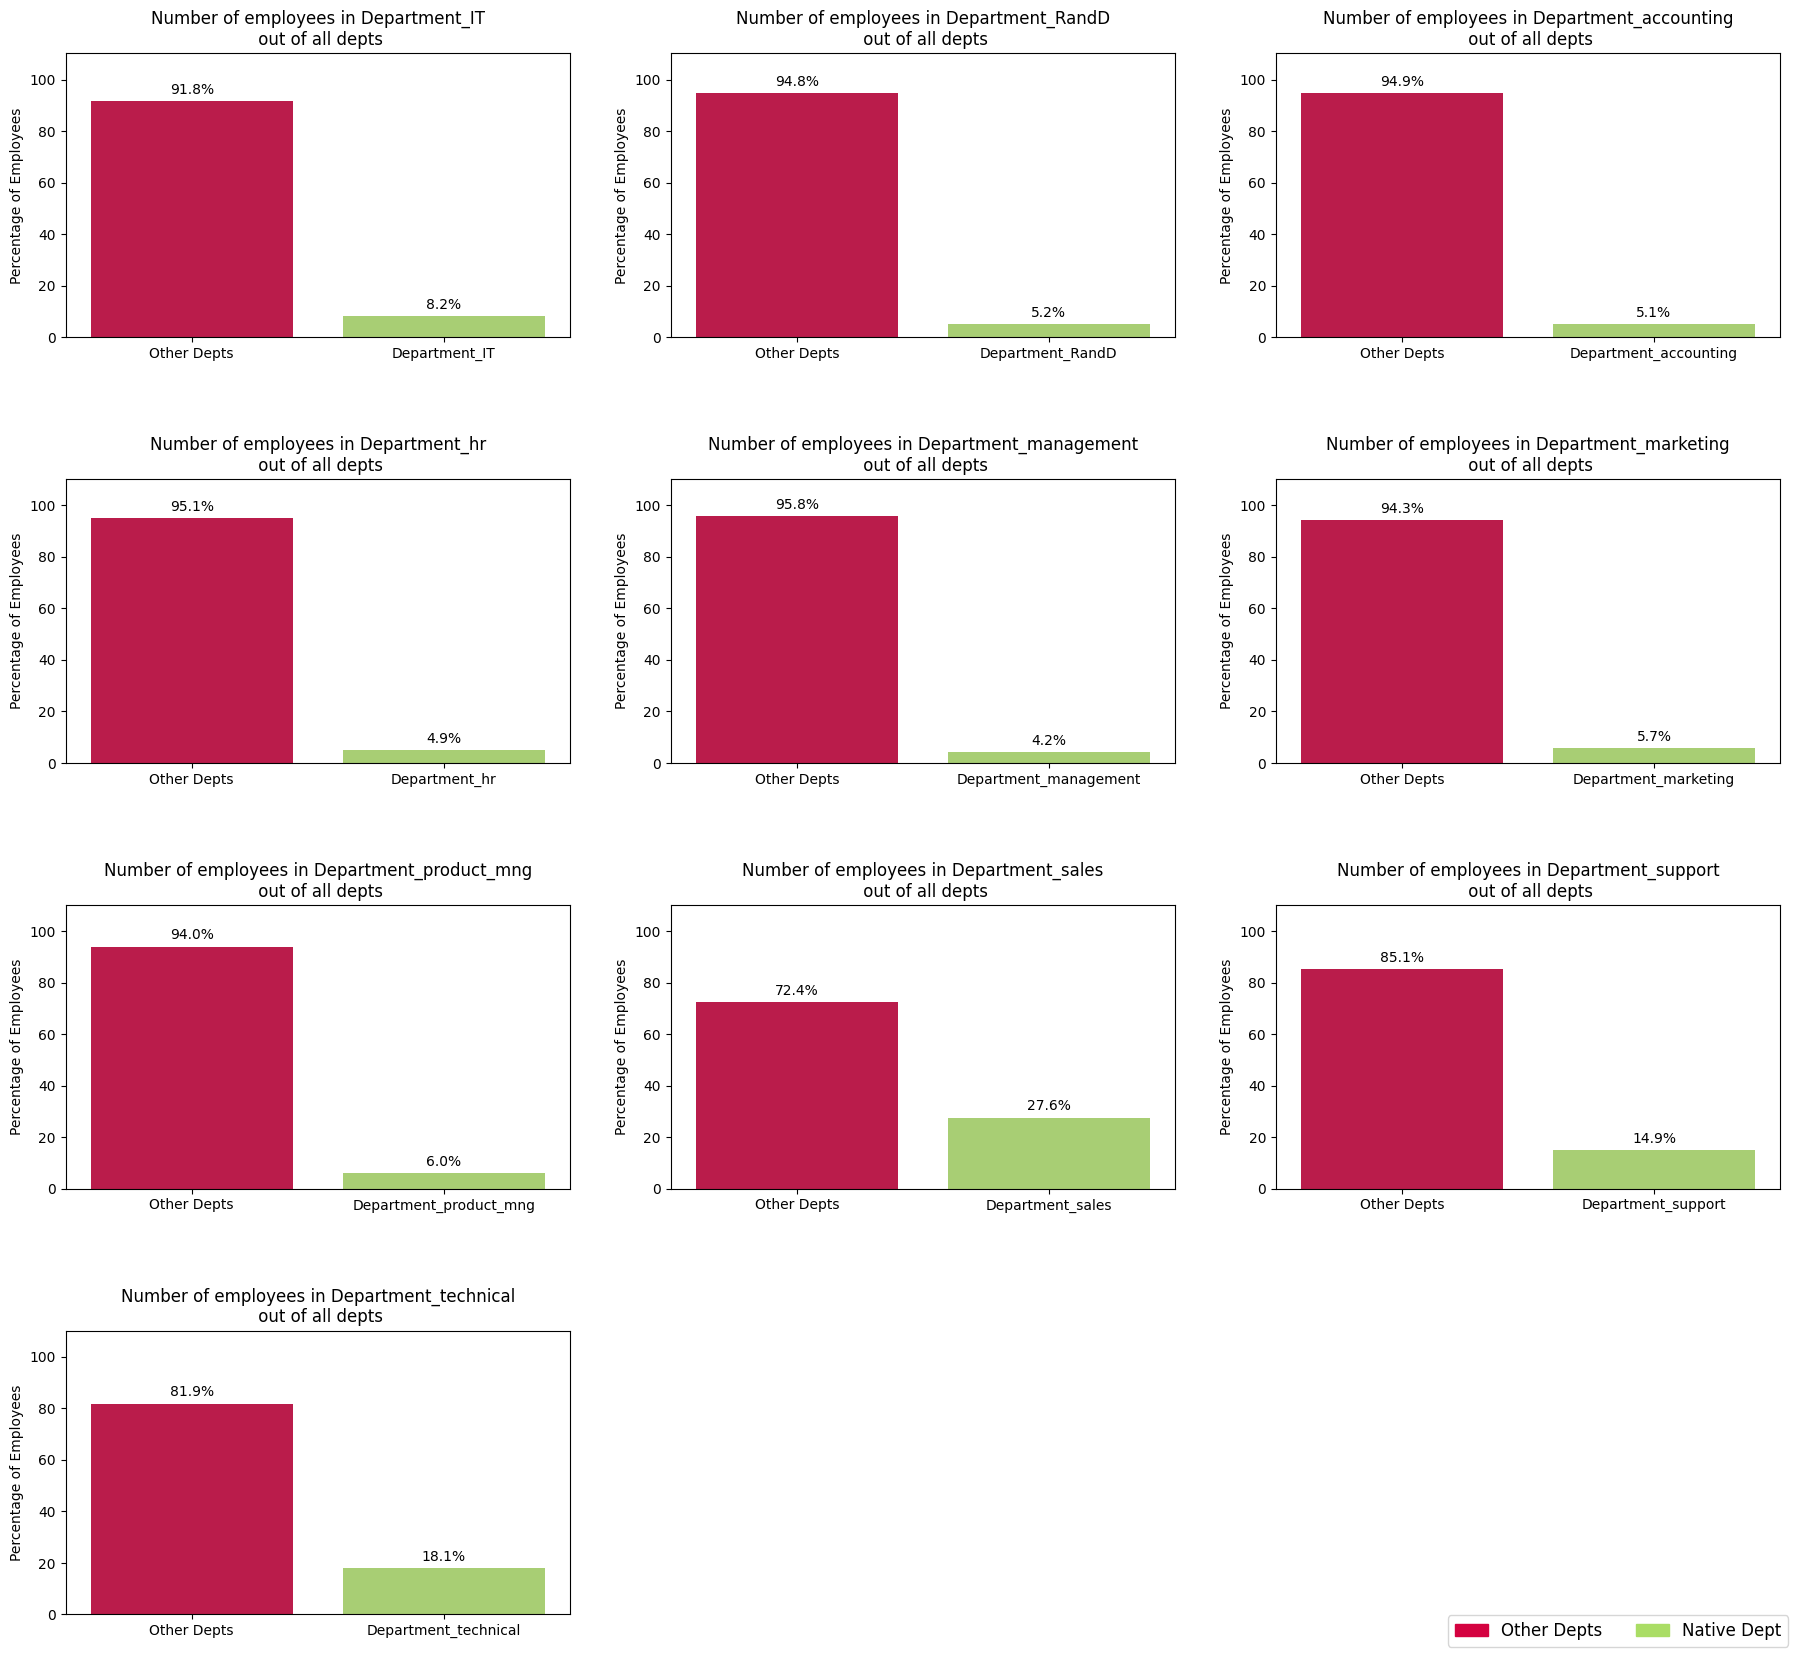

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from matplotlib.colors import to_hex
import matplotlib.patches as mpatches

# Assuming 'df' now contains the one-hot encoded department columns
# List of one-hot encoded department columns
department_columns = [col for col in numeric_df.columns if col.startswith('Department_')]

# Check if department_columns is empty
if not department_columns:
    raise ValueError("No department columns found in the DataFrame")

# Dynamically calculate the number of rows and columns needed for the subplots
num_depts = len(department_columns)
num_cols = 3
num_rows = (len(department_columns) + num_cols - 1) // num_cols

# Check if num_rows is valid
if num_rows <= 0:
    raise ValueError("Invalid number of rows calculated")

def generate_distinct_colors():
    def random_color():
        return np.random.rand(3,)
    color1 = random_color()
    color2 = random_color()
    while np.linalg.norm(color1 - color2) < 0.6:
        color2 = random_color()
    return to_hex(color1), to_hex(color2)

# Generate two distinct colors
native_color, other_color = generate_distinct_colors()

# Now we have to create the subplots and dynamically arrange them and set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))

# Now we have to flatten the axes to make it easier to iterate over them
# The axes is a 2D array which was returned when we called plt.subplots
axes = axes.flatten()

# Compute the total number of employees
total_employees = numeric_df.shape[0]

# Now we have to iterate over each department and plot the count of employees in each department
for idx, dept_col in enumerate(department_columns):
    # Conversion of raw counts to percentage for better readability of the plot
    native_count = numeric_df[dept_col].sum()
    other_count = total_employees - native_count
    native_percentage = (native_count / total_employees) * 100
    other_percentage = (other_count / total_employees) * 100

    # Use a barplot instead of a countplot and set the limit of the y-axis to 100
    ax = axes[idx]
    bars = sns.barplot(x=['Other Depts', dept_col], y=[other_percentage, native_percentage], palette=[other_color, native_color], ax=ax)
    ax.set_title(f'Number of employees in {dept_col}\n out of all depts', fontsize=12)
    ax.set_ylabel('Percentage of Employees', fontsize=10)
    ax.set_xticklabels(['Other Depts', dept_col])
    
    
    # Add annotations to the bars
    for bar, percentage in zip(bars.patches, [other_percentage, native_percentage]):

        height = bar.get_height()
        ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)
    
max_height=max([bar.get_height() for ax in axes for bar in ax.patches])
for ax in axes:
    ax.set_ylim(0,max_height*1.15)
# Now we have to remove the empty subplots
for idx in range(len(department_columns), len(axes)):
    fig.delaxes(axes[idx])
# Now we have to make a custom legend for the figure to make it more readable
legend_handles = [
    mpatches.Patch(color=other_color, label="Other Depts"),
    mpatches.Patch(color=native_color, label='Native Dept')
]
fig.legend(handles=legend_handles, loc='lower right', ncol=2, fontsize=12)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.subplots_adjust(top=1)
plt.show()

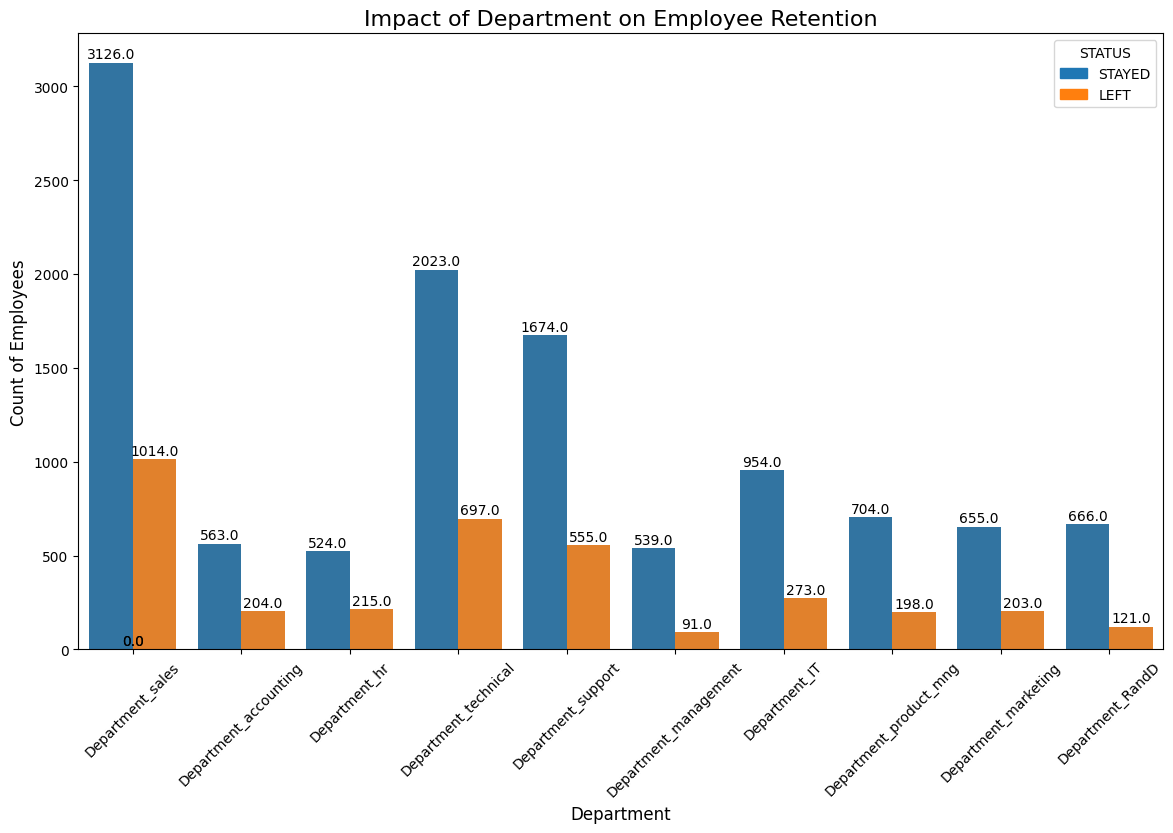

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
# Assuming 'df' contains the one-hot encoded department columns, and 'Department_' columns exist
# Reverting the one-hot encoding by using the original department names (we'll extract the department names)

# Create a new column 'Department_idxmax' by checking which encoded column is set to 1 for each row
df['Department_idxmax'] = df[[col for col in numeric_df.columns if 'Department_' in col]].idxmax(axis=1)

# Map the column names back to the original department names
#department_mapping = {f'Department_{dept}': dept for dept in df['Department'].unique()}
#df['Department_idxmax'] = df['Department_idxmax'].map(department_mapping)

# Now we can plot the barplot for the 'Department' column vs 'left'
plt.figure(figsize=(14, 8))
ax=sns.countplot(data=df, x='Department_idxmax', hue='left')

# Adding title and labels
plt.title("Impact of Department on Employee Retention", fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.1f}',xy=(p.get_x()+(p.get_width()/2),height),xytext=(0,1),textcoords='offset points',ha='center',va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
legend_handles=[mpatches.Patch(color=sns.color_palette()[0],label="STAYED"),mpatches.Patch(color=sns.color_palette()[1],label='LEFT')]
plt.legend(handles=legend_handles,title='STATUS',loc='upper right')
# Show the plot
plt.show()


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\617175331.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\617175331.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\617175331.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\617175331.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\617175331.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON

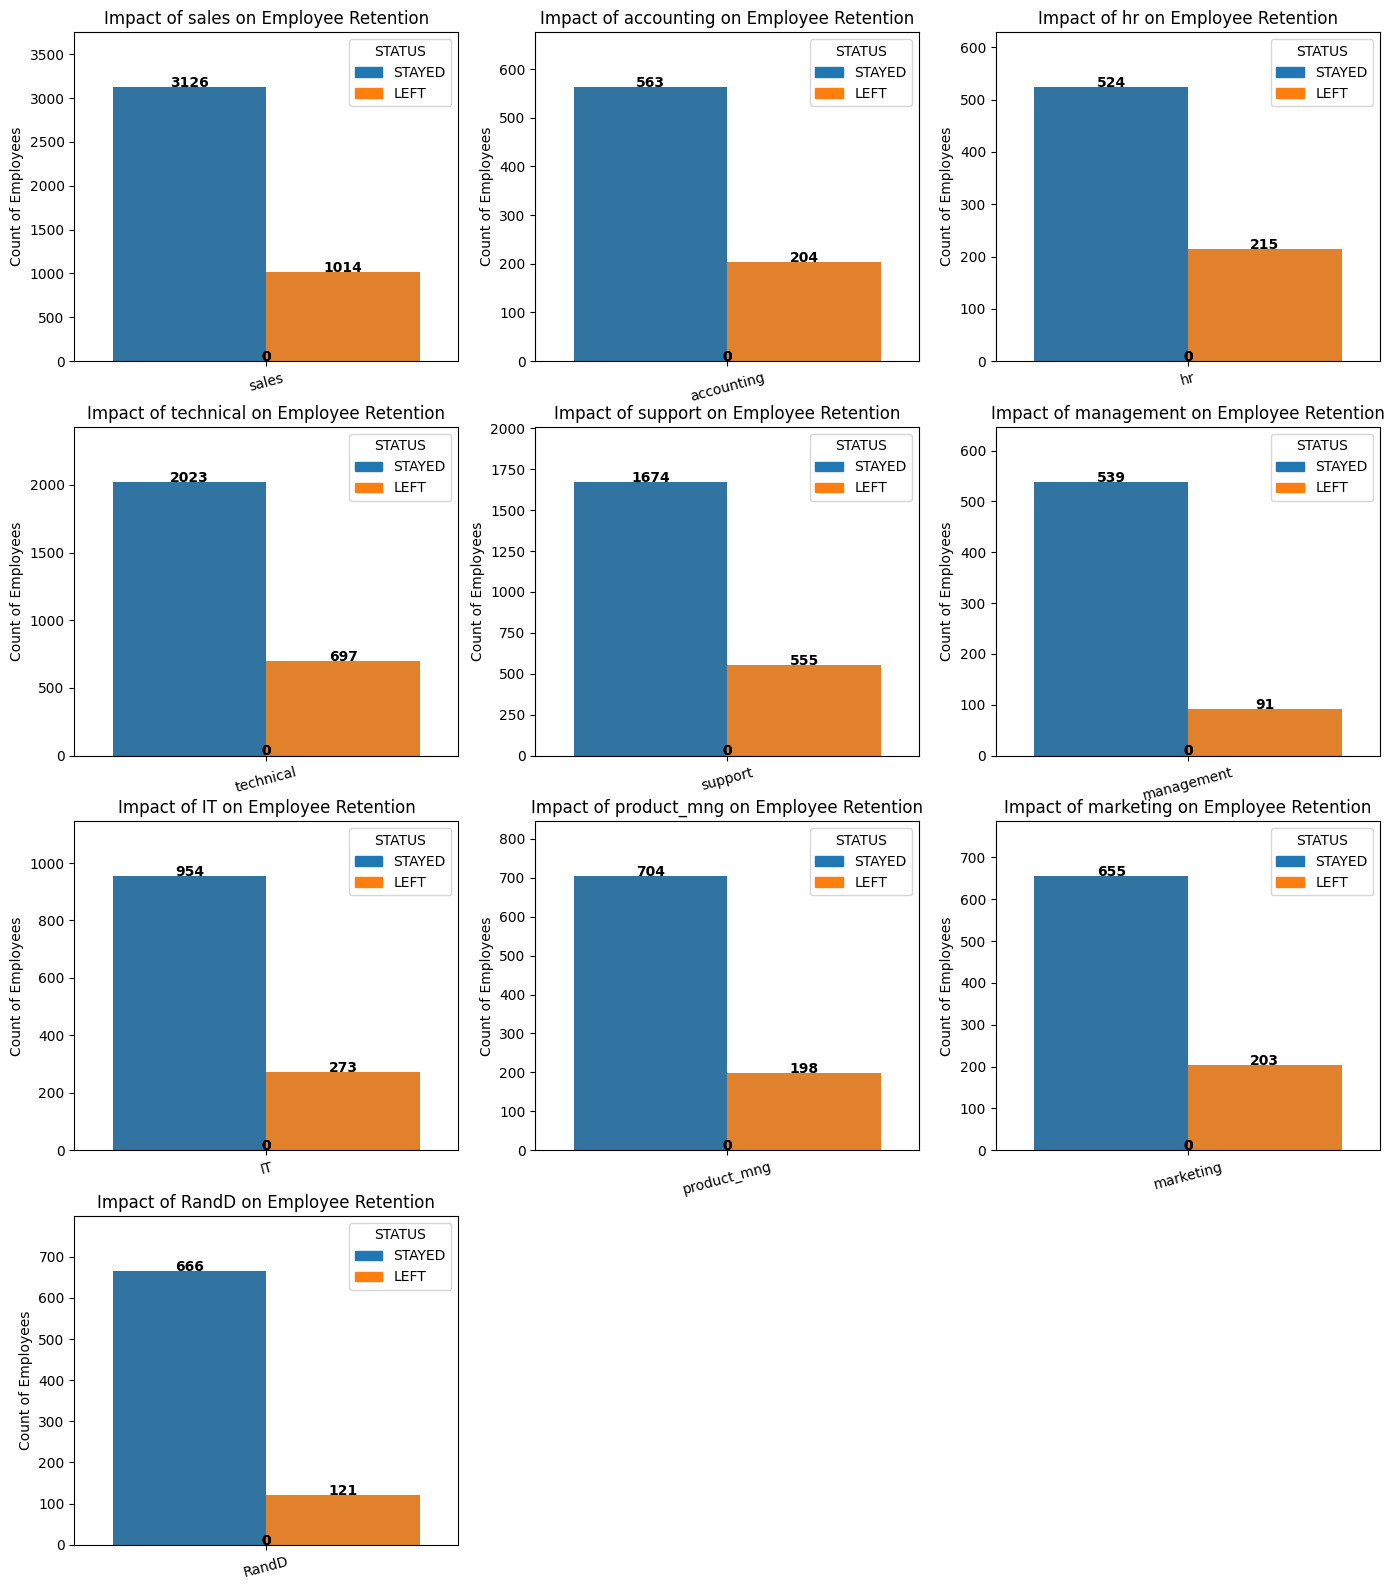

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches

# Assuming 'df' contains the 'Department' column
departments = df['Department'].unique()
num_depts = len(departments)
num_cols = 3  # Adjust the number of columns as needed
num_rows = math.ceil(num_depts / num_cols)

# Create subplots WITHOUT shared y-axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))  # Removed sharey=True
axes = axes.flatten()

# Plot each department's retention as a barplot
for idx, dept in enumerate(departments):
    sns.countplot(data=df[df['Department'] == dept], x='Department', hue='left', ax=axes[idx], hue_order=[0, 1])
    axes[idx].set_title(f"Impact of {dept} on Employee Retention", fontsize=12)
    axes[idx].set_xlabel('', fontsize=10)  # Fixed x-label to 'Department'
    axes[idx].set_ylabel('Count of Employees', fontsize=10)
    axes[idx].set_xticklabels([dept], rotation=15)  # Show department name on x-axis
    legend_handles=[mpatches.Patch(color=sns.color_palette()[0],label='STAYED'),mpatches.Patch(color=sns.color_palette()[1],label='LEFT')]
    axes[idx].legend(handles=legend_handles, title='STATUS', loc='upper right')

    # Annotate bars with count values
    for p in axes[idx].patches:
        height = p.get_height()
        axes[idx].annotate(
            f'{int(height)}',
            xy=(p.get_x() + p.get_width() / 2., height),
            xytext=(0, 3), textcoords='offset points', fontsize=10, color='black', fontweight='bold', ha='center', va='center'
        )

# Calculate the maximum height of bars in each subplot and leave a buffer space of 0.2 times the max height
for ax in axes[:len(departments)]:  # Only adjust subplots that have data
    subplot_max = max([bar.get_height() for bar in ax.patches])  # Find max height for this subplot
    ax.set_ylim(0, subplot_max * 1.2)

# Hide empty subplots (if any)
for idx in range(num_depts, len(axes)):
    axes[idx].set_visible(False)


plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\2089332202.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\2089332202.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\2089332202.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\2089332202.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\2089332202.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\L

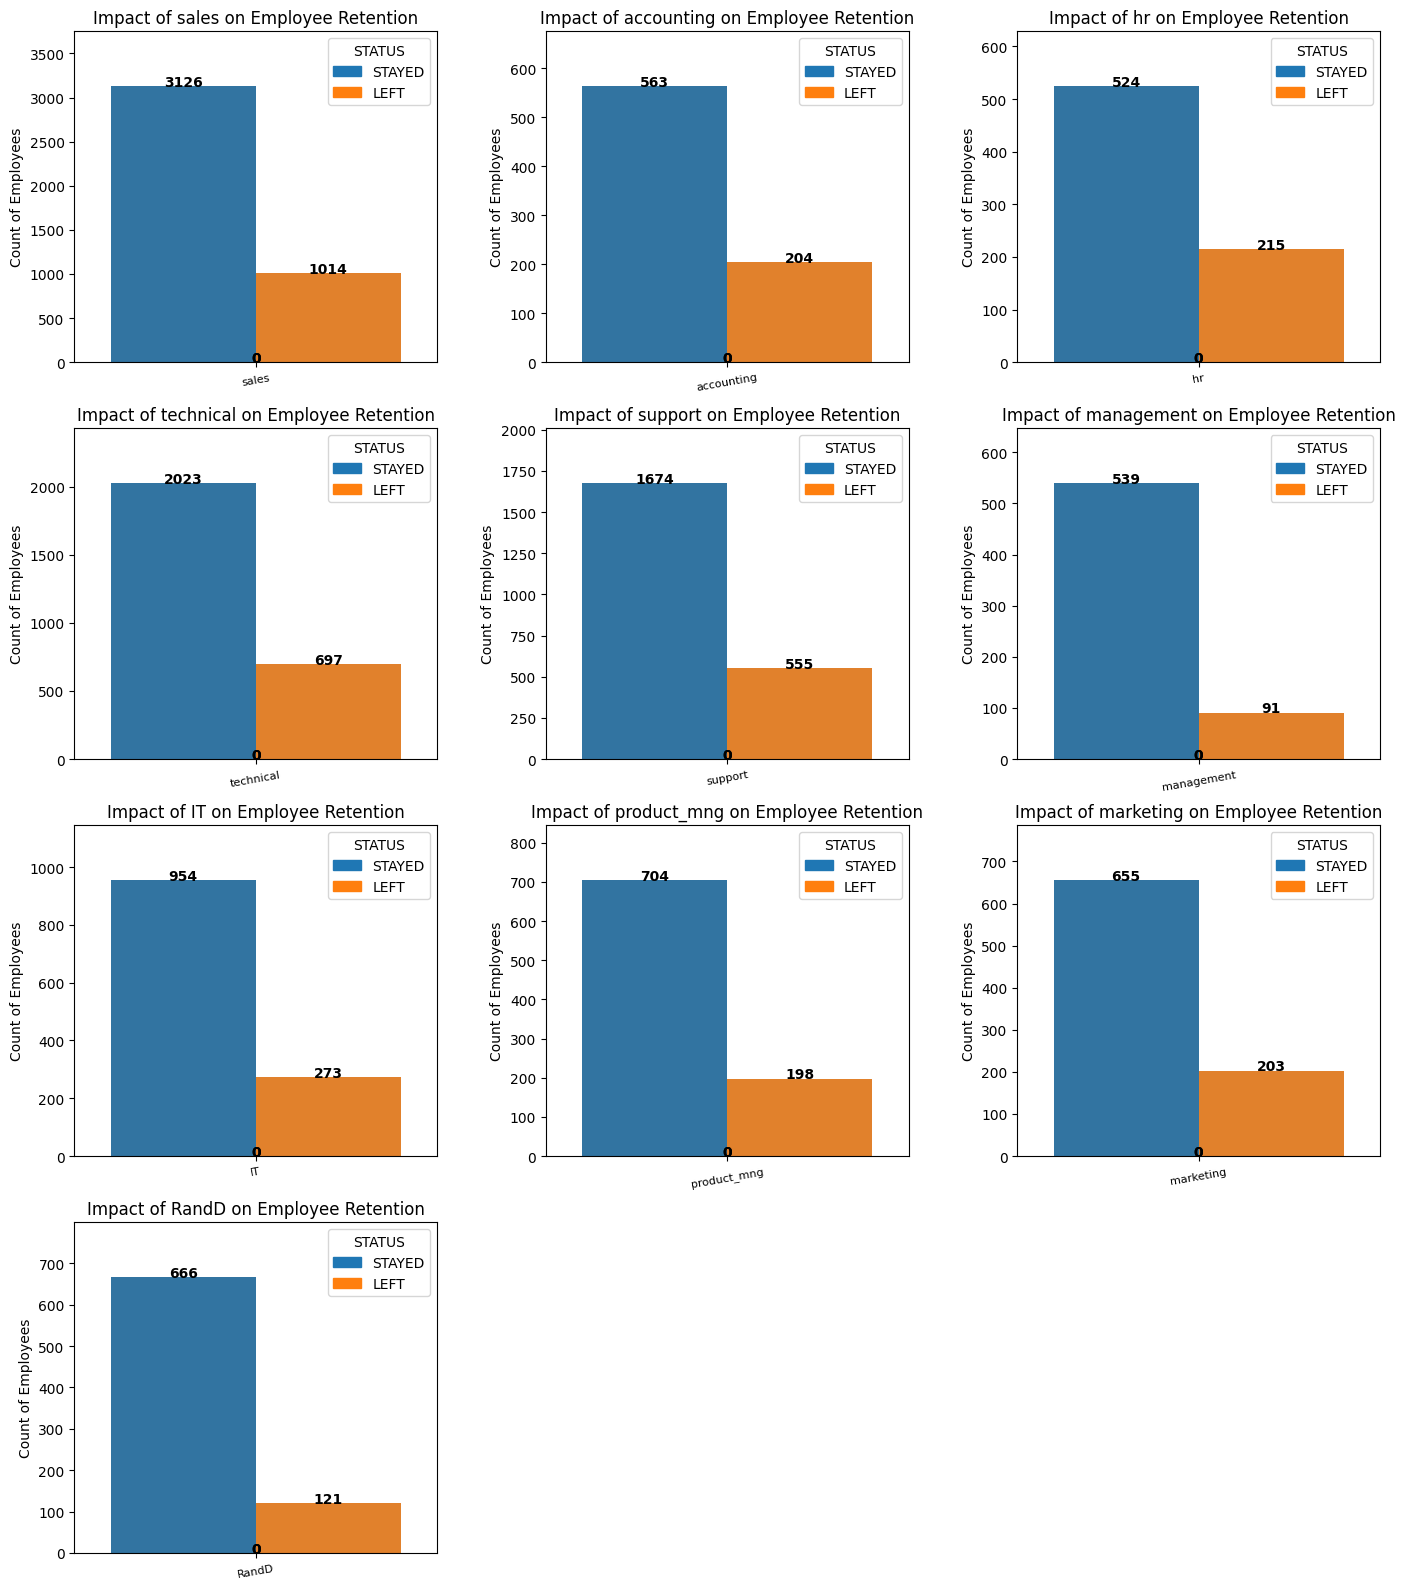

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'df' now contains the 'Department' column with the original department names
# List of unique departments (no need to filter columns, just use the 'Department' column)
departments = df['Department'].unique()

# Dynamically calculate the number of rows and columns needed for the subplots
num_depts = len(departments)
num_cols = 3  # You can adjust this value to have more or fewer columns in the grid
num_rows = math.ceil(num_depts / num_cols)  # Round up to get the necessary number of rows

# Create the subplots with an adjusted figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows), sharey=False)

# Flatten axes for easier indexing if it's a multi-row grid
axes = axes.flatten()

# Plot each department's retention as a barplot
for idx, dept in enumerate(departments):
    sns.countplot(data=df[df['Department'] == dept], x='Department', hue='left', ax=axes[idx])
    axes[idx].set_title(f"Impact of {dept} on Employee Retention", fontsize=12)
    axes[idx].set_xlabel('', fontsize=10)
    axes[idx].set_ylabel('Count of Employees', fontsize=10)

    # Show department name on the x-axis and rotate by 10 degrees
    axes[idx].set_xticklabels([dept], rotation=10, fontsize=8)  # Set angle to 10 and reduce fontsize
    legend_handles=[mpatches.Patch(color=sns.color_palette()[0],label='STAYED'),mpatches.Patch(color=sns.color_palette()[1],label='LEFT')]
    axes[idx].legend(handles=legend_handles, title='STATUS', loc='upper right')

    # Annotate the bars with count values
    for p in axes[idx].patches:
        height = p.get_height()
        axes[idx].annotate(
            f'{int(height)}',
            xy=(p.get_x() + p.get_width() / 2., height),xytext=(0, 3), textcoords='offset points',
            ha='center', va='center', fontsize=10, color='black', fontweight='bold'
        )
    axes[idx].yaxis.set_tick_params(which='both', labelleft=True)
 # Only adjust subplots that have data
for ax in axes[:len(departments)]:
        subplot_max = max([bar.get_height() for bar in ax.patches])  # Find max height for this subplot
        ax.set_ylim(0, subplot_max * 1.2)
    # Force y-axis tick labels to appear on EVERY subplot
    

    # Add the legend for each subplot individually
    

# Hide empty subplots (if any)
for idx in range(num_depts, len(axes)):
    axes[idx].set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()


C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\1716167677.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\1716167677.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\1716167677.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\1716167677.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\LINKON\AppData\Local\Temp\ipykernel_3408\1716167677.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\L

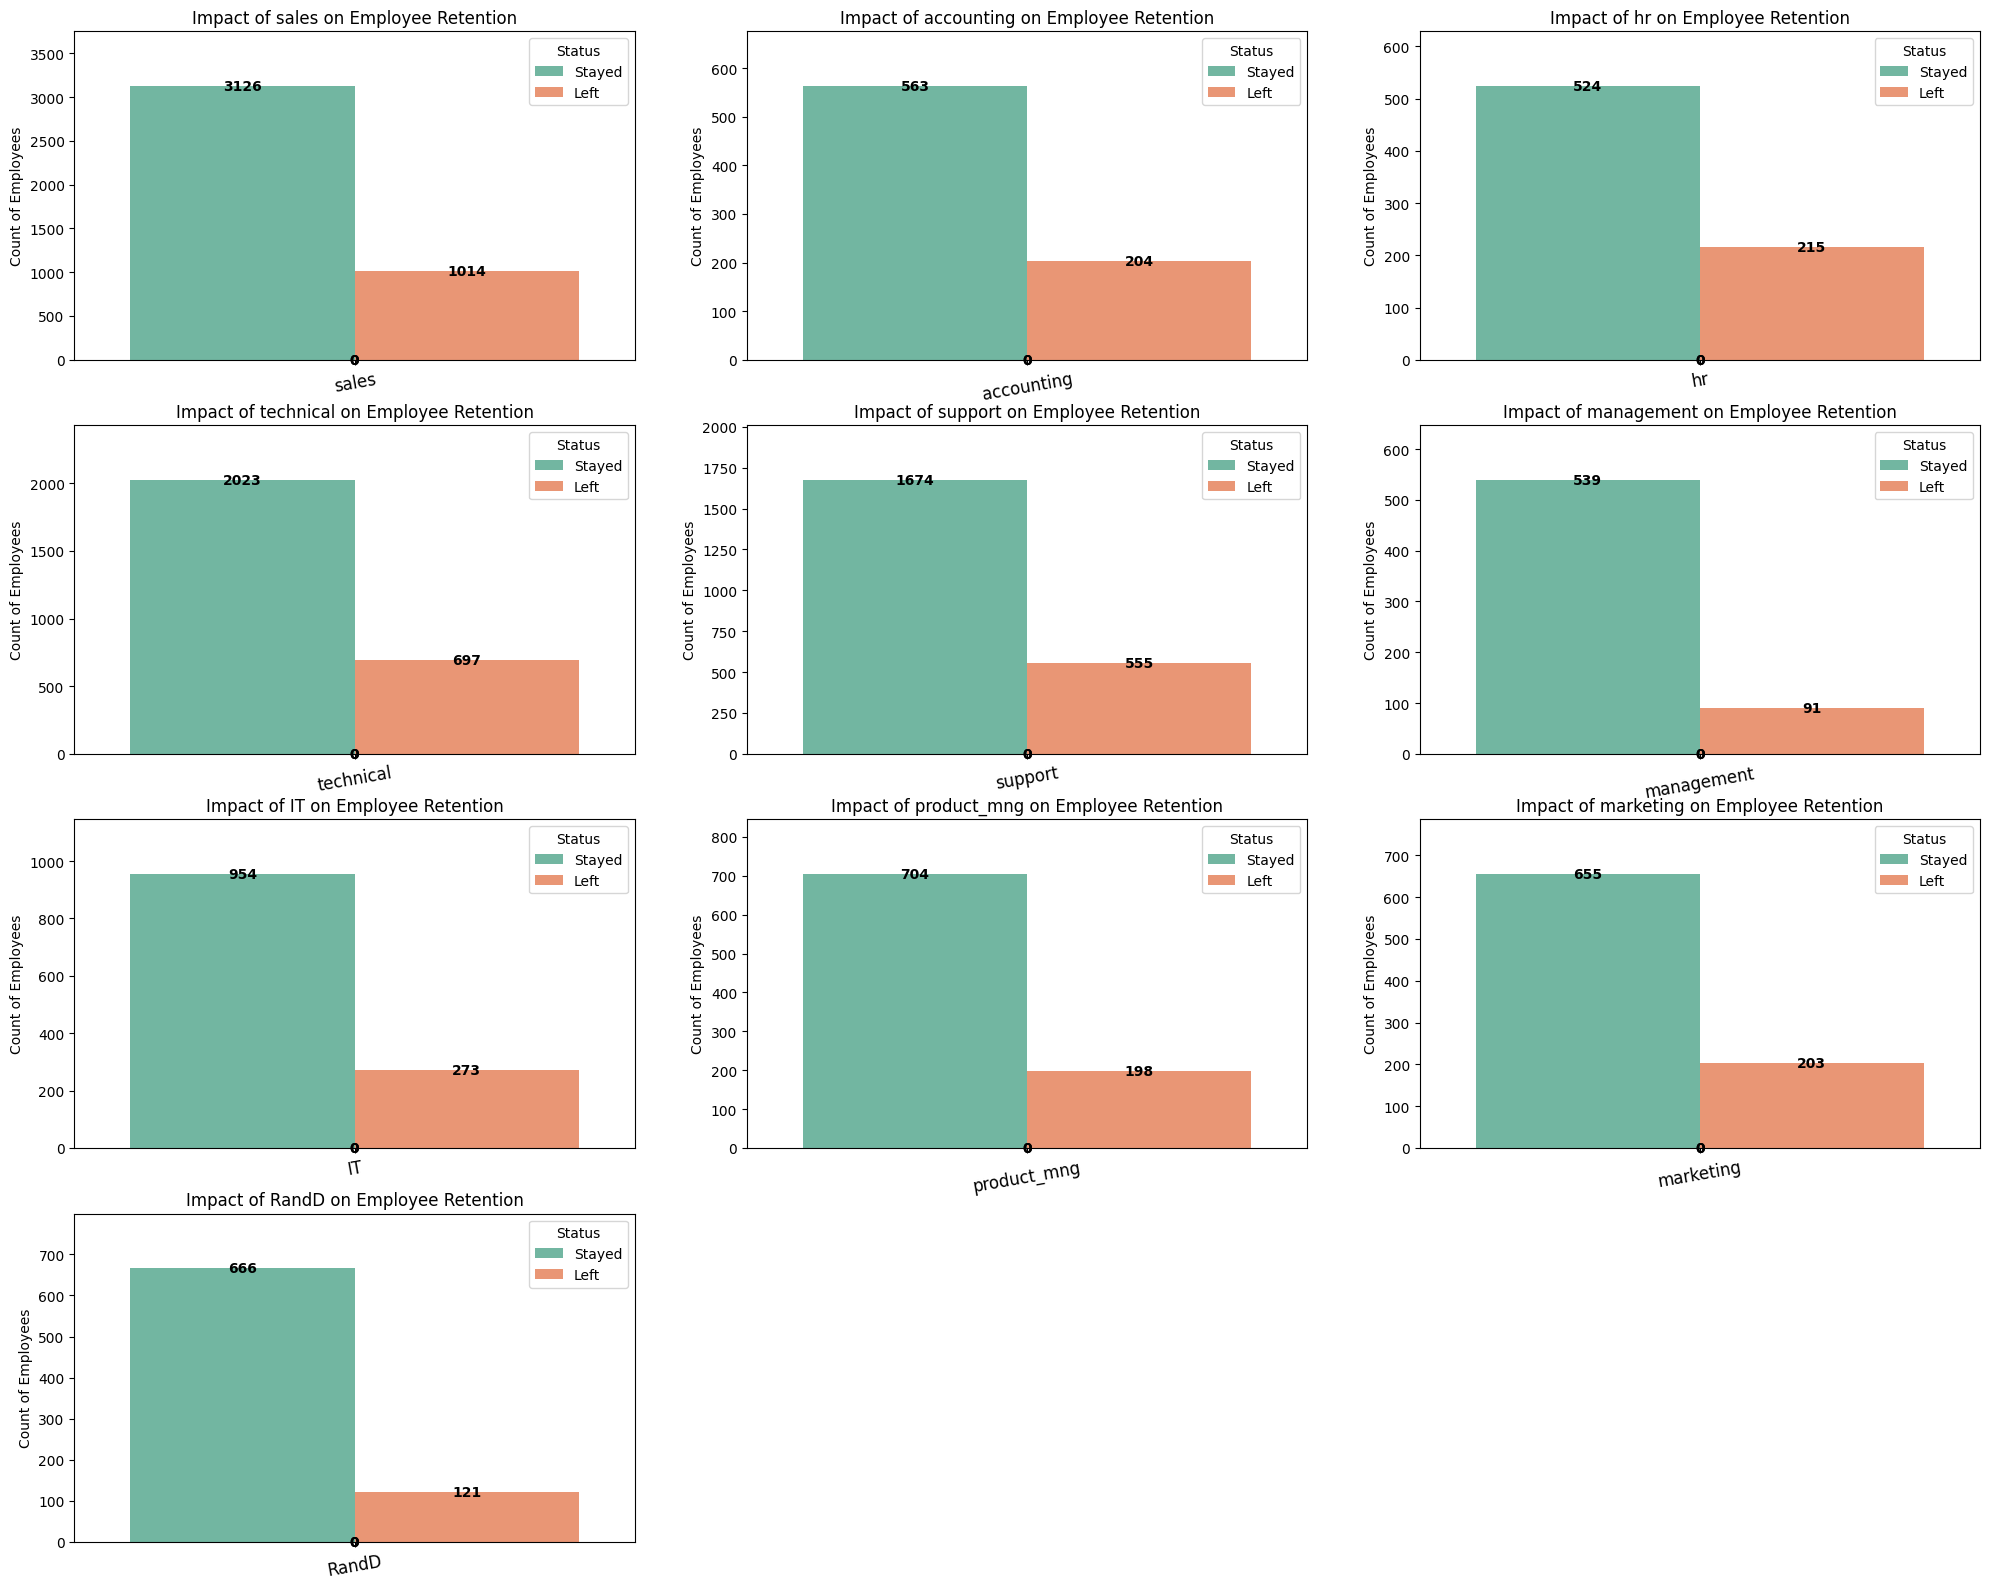

In [330]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

# Assuming 'df' now contains the 'Department' column with the original department names
# List of unique departments (no need to filter columns, just use the 'Department' column)
departments = df['Department'].unique()

# Dynamically calculate the number of rows and columns needed for the subplots
num_depts = len(departments)
num_cols = 3  # You can adjust this value to have more or fewer columns in the grid
num_rows = math.ceil(num_depts / num_cols)  # Round up to get the necessary number of rows

# Create the subplots with an adjusted figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows), sharey=False)

# Flatten axes for easier indexing if it's a multi-row grid
axes = axes.flatten()

# Plot each department's retention as a barplot
for idx, dept in enumerate(departments):
    sns.countplot(data=df[df['Department'] == dept], x='Department', hue='left', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f"Impact of {dept} on Employee Retention", fontsize=12)
    axes[idx].set_ylabel('Count of Employees', fontsize=10)
    
    # Remove 'Department' label under the x-axis in every subplot
    axes[idx].set_xlabel('')  # Disable x-axis label text

    # Show department name on the x-axis and rotate by 10 degrees
    axes[idx].set_xticklabels([dept], rotation=10, fontsize=12)  # Set angle to 10 and reduce fontsize

    # Annotate the bars with count values
    for p in axes[idx].patches:
        height = p.get_height()
        axes[idx].annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center', fontsize=10, color='black', fontweight='bold'
        )
    # Force y-axis tick labels to appear on EVERY subplot
    axes[idx].yaxis.set_tick_params(which='both', labelleft=True)
    
    # Update the legend
    handles, labels = axes[idx].get_legend_handles_labels()
    axes[idx].legend(handles, ['Stayed', 'Left'], title='Status', loc='upper right')
for ax in axes[:len(departments)]:
    subplot_max =max([bar.get_height() for bar in ax.patches])
    ax.set_ylim(0,subplot_max*1.2)

# Hide empty subplots (if any)
for idx in range(num_depts, len(axes)):
    axes[idx].set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


In [337]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
features=['satisfaction_level','time_spend_company','Work_accident','promotion_last_5years','encoded_salary']
target='left'
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
# Ensure that the features used for prediction match those used during training
x_test_features = x_test[features]
model=LR()
model.fit(x_train,y_train)
predicted_retention = model.predict(x_test_features)
predicted_retention_proba = model.predict_proba(x_test_features)[:, 1]
accuracy = accuracy_score(y_test, predicted_retention)
label_mapping = {0: 'stayed', 1: 'left'}
mapped_predictions = [label_mapping[pred] for pred in predicted_retention]
df_predictions = x_test.copy()
df_predictions['Actual Status'] = y_test.map(label_mapping)
df_predictions['Predicted Status'] = mapped_predictions
df_predictions['Prediction Probability(leaving)'] = predicted_retention_proba
df_predictions


,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,encoded_salary,Actual Status,Predicted Status,Prediction Probability(leaving)
6723,0.65,2,1,0,1.0,stayed,stayed,0.028436
6473,0.88,2,0,0,0.0,stayed,stayed,0.099162
4679,0.69,2,0,0,0.0,stayed,stayed,0.182961
862,0.41,3,0,0,0.0,left,stayed,0.445530
7286,0.87,2,1,0,0.0,stayed,stayed,0.024905
...,...,...,...,...,...,...,...,...
3297,0.61,6,0,0,1.0,stayed,stayed,0.277076
14113,0.93,7,1,0,1.0,stayed,stayed,0.031608
5514,0.78,3,0,0,1.0,stayed,stayed,0.092142
9939,0.89,2,0,0,1.0,stayed,stayed,0.050689


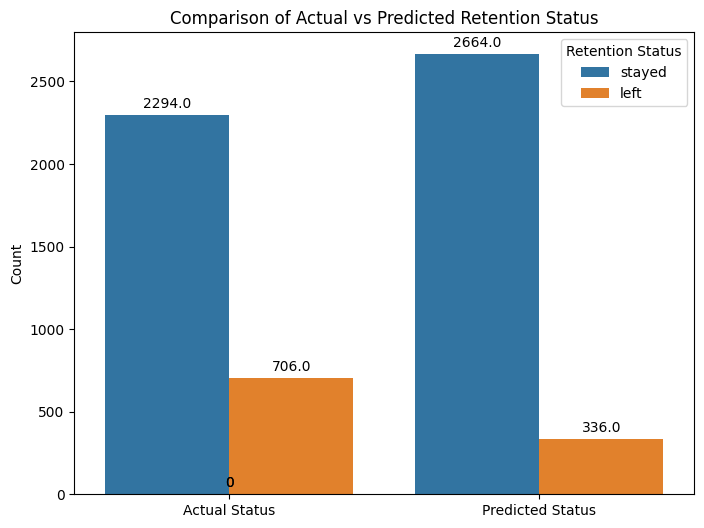

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_predictions is already created and contains 'Actual Status' and 'Predicted Status' columns

# Reshape the data to have Actual and Predicted statuses in a single column
df_melted = df_predictions.melt(value_vars=['Actual Status', 'Predicted Status'], 
                                var_name='Status Type', 
                                value_name='Retention Status')

# Plot the grouped bar chart
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_melted, x='Status Type', hue='Retention Status')

# Annotate each bar
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',xy=(p.get_x()+(p.get_width()/2),height),xytext=(0,3),
                textcoords='offset points',ha='center',va='bottom')

# Add labels
plt.title("Comparison of Actual vs Predicted Retention Status")
plt.xlabel("")
plt.ylabel("Count")

# Show the plot
plt.show()


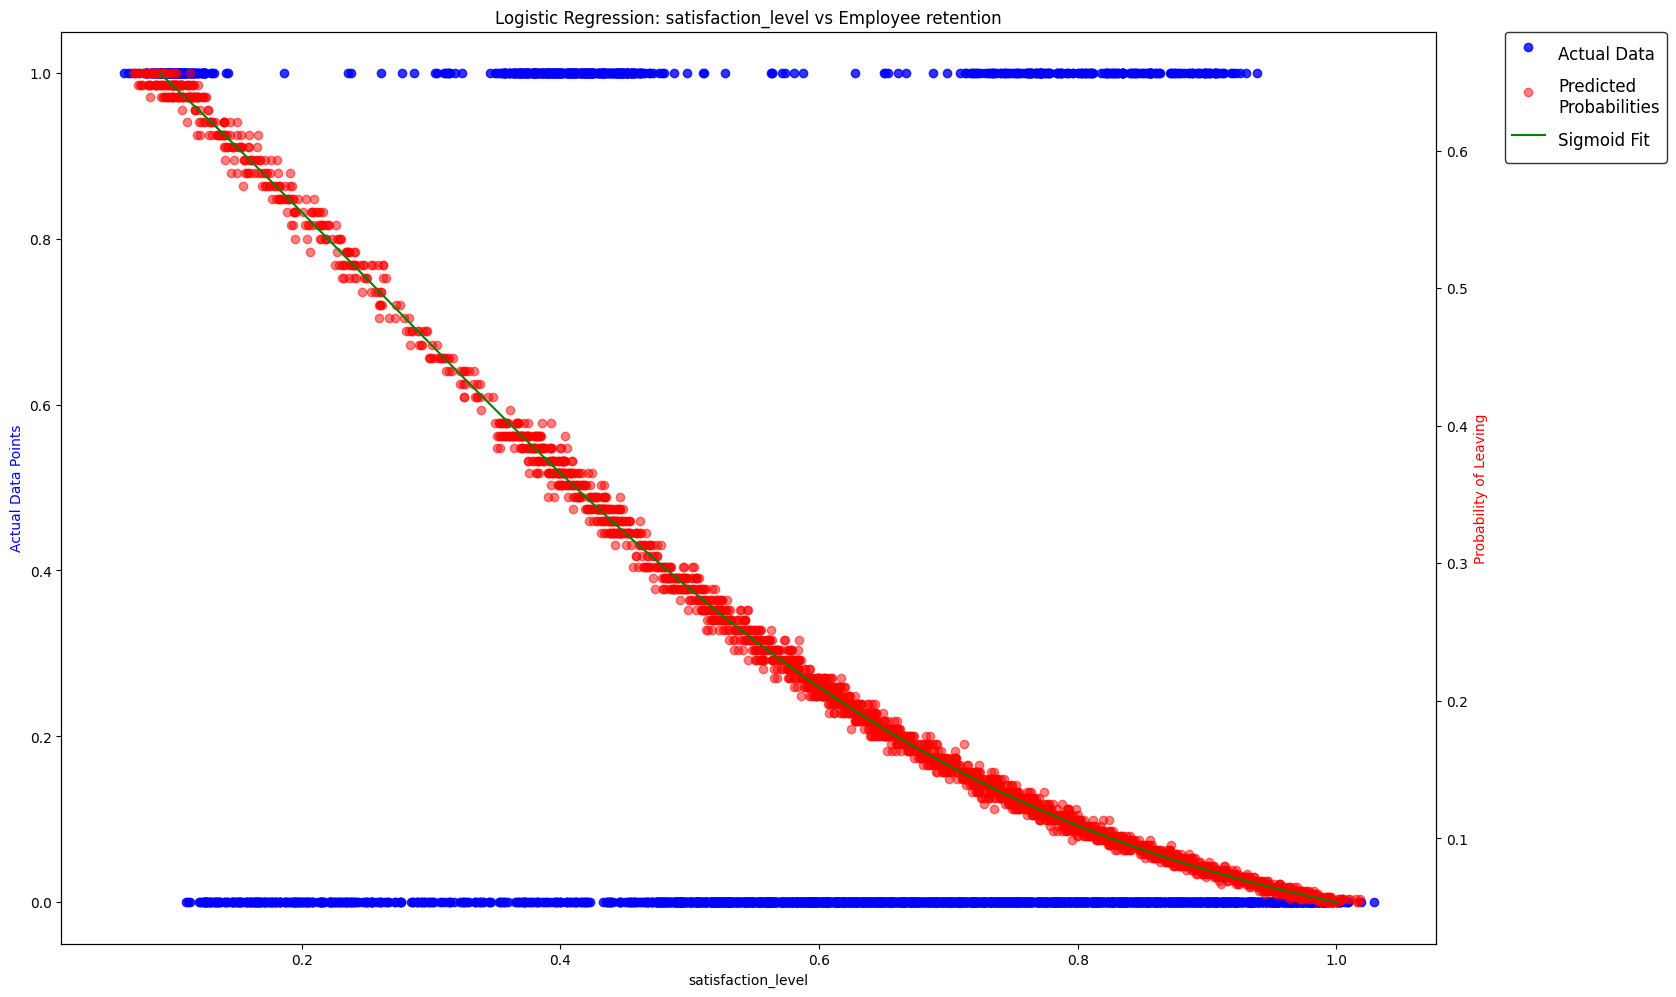

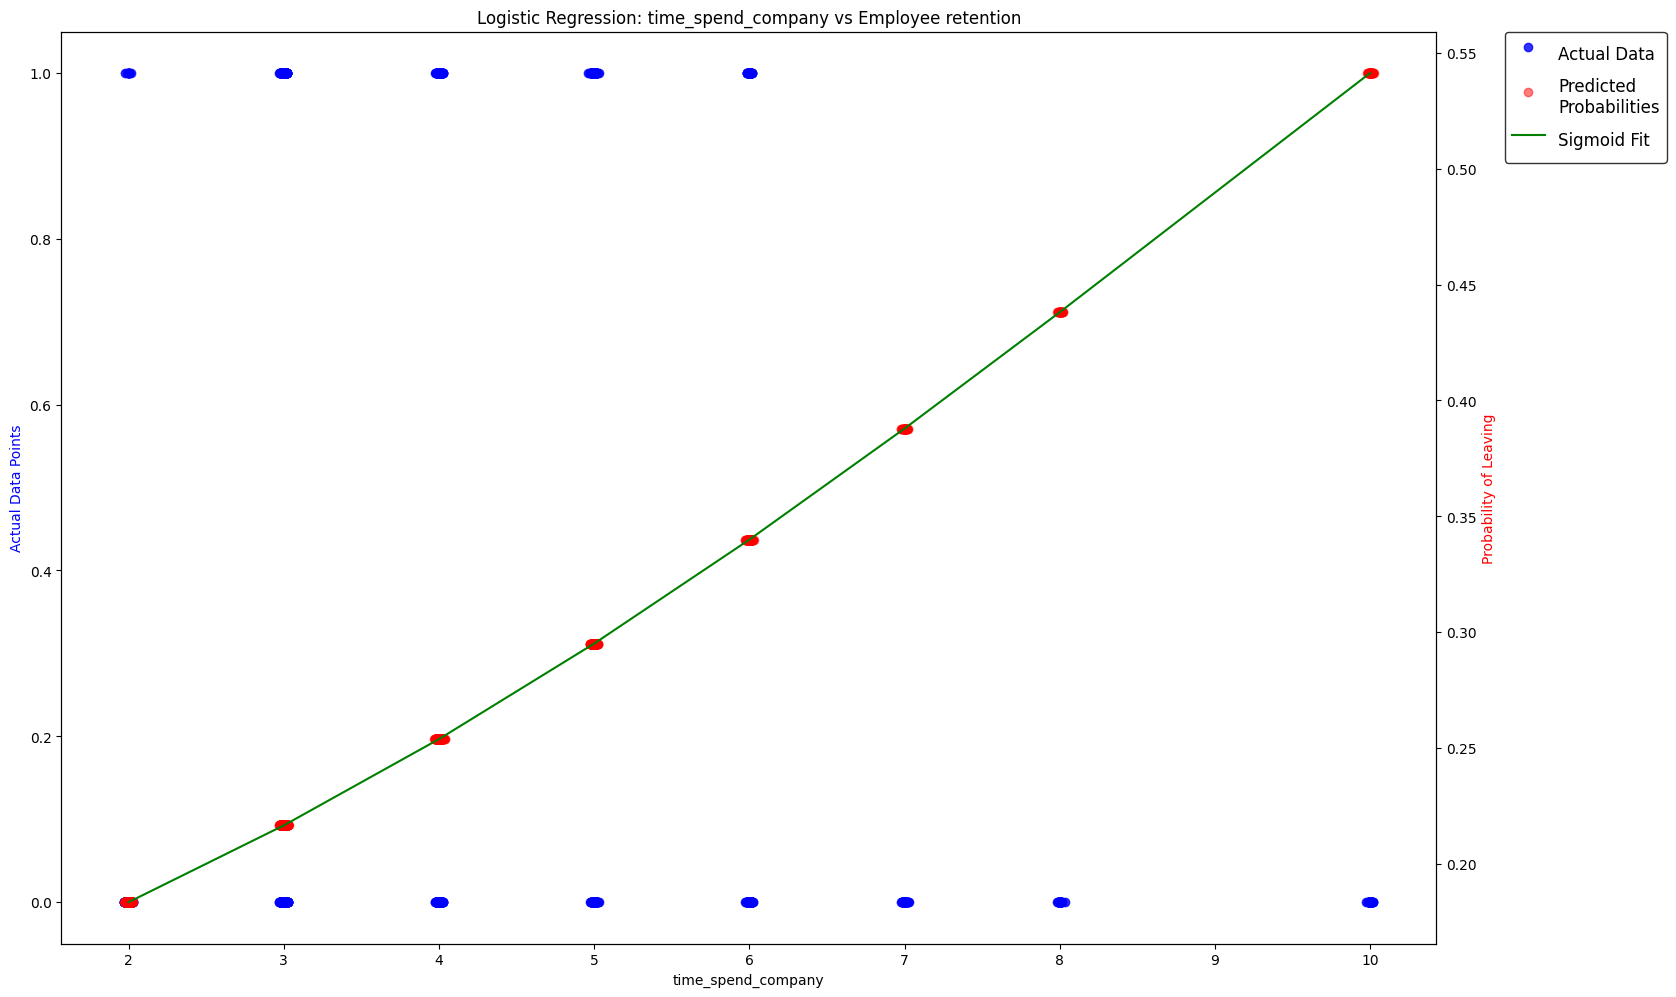

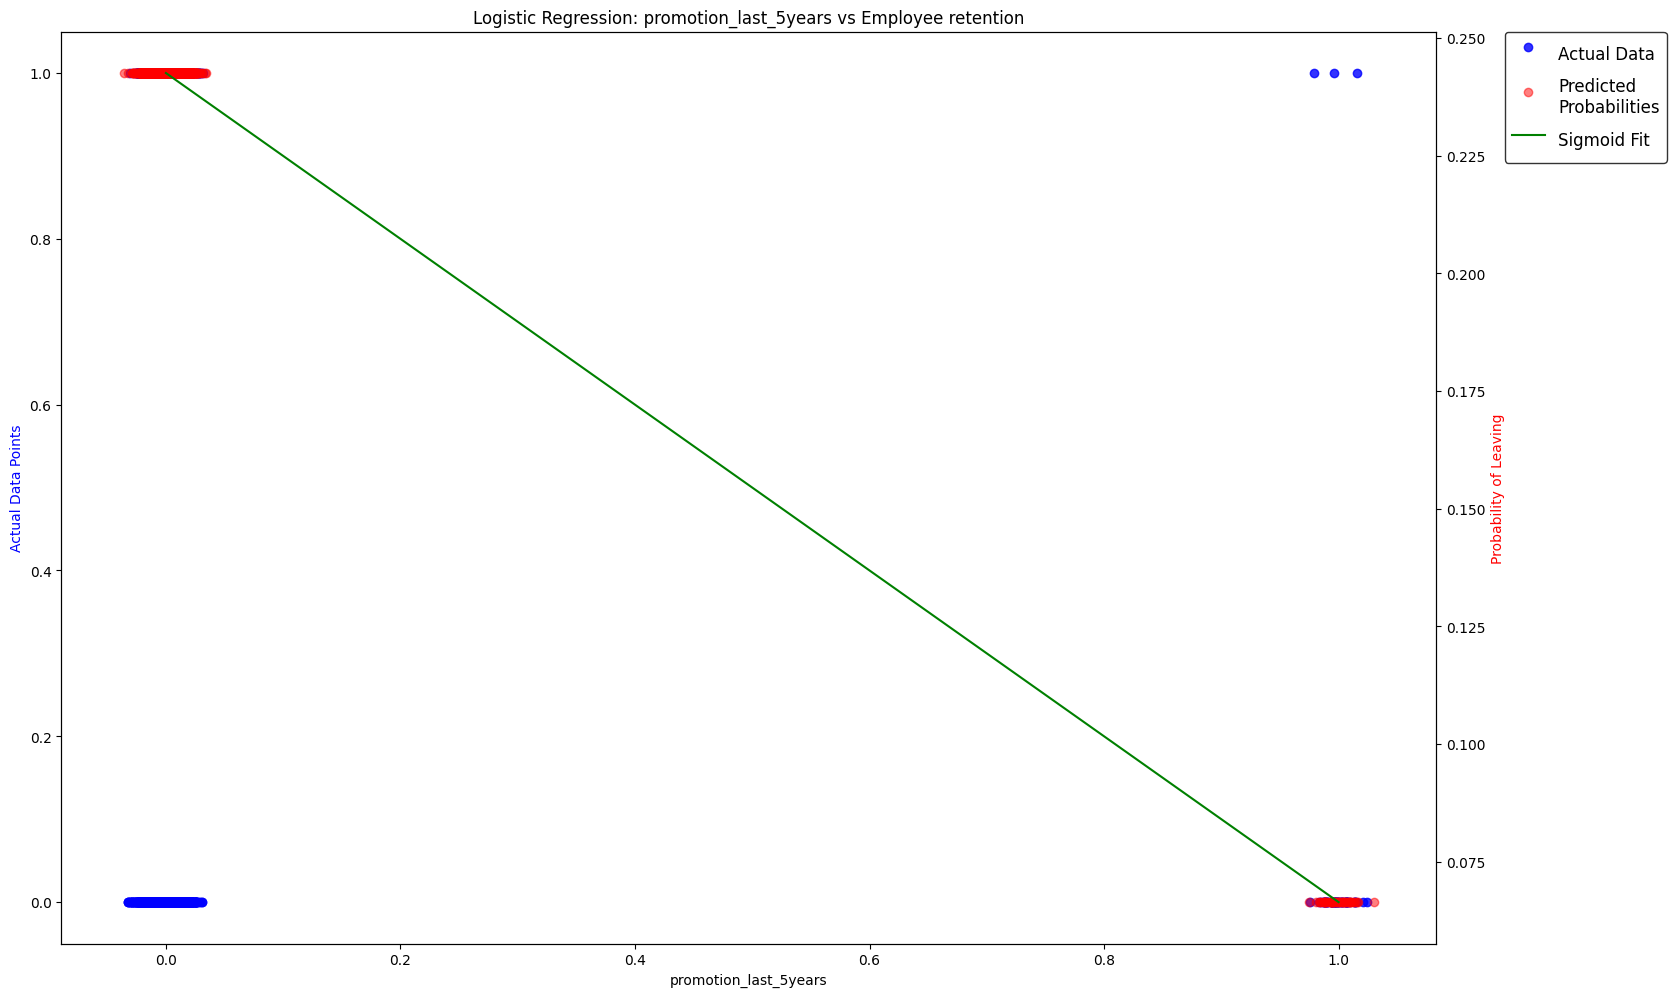

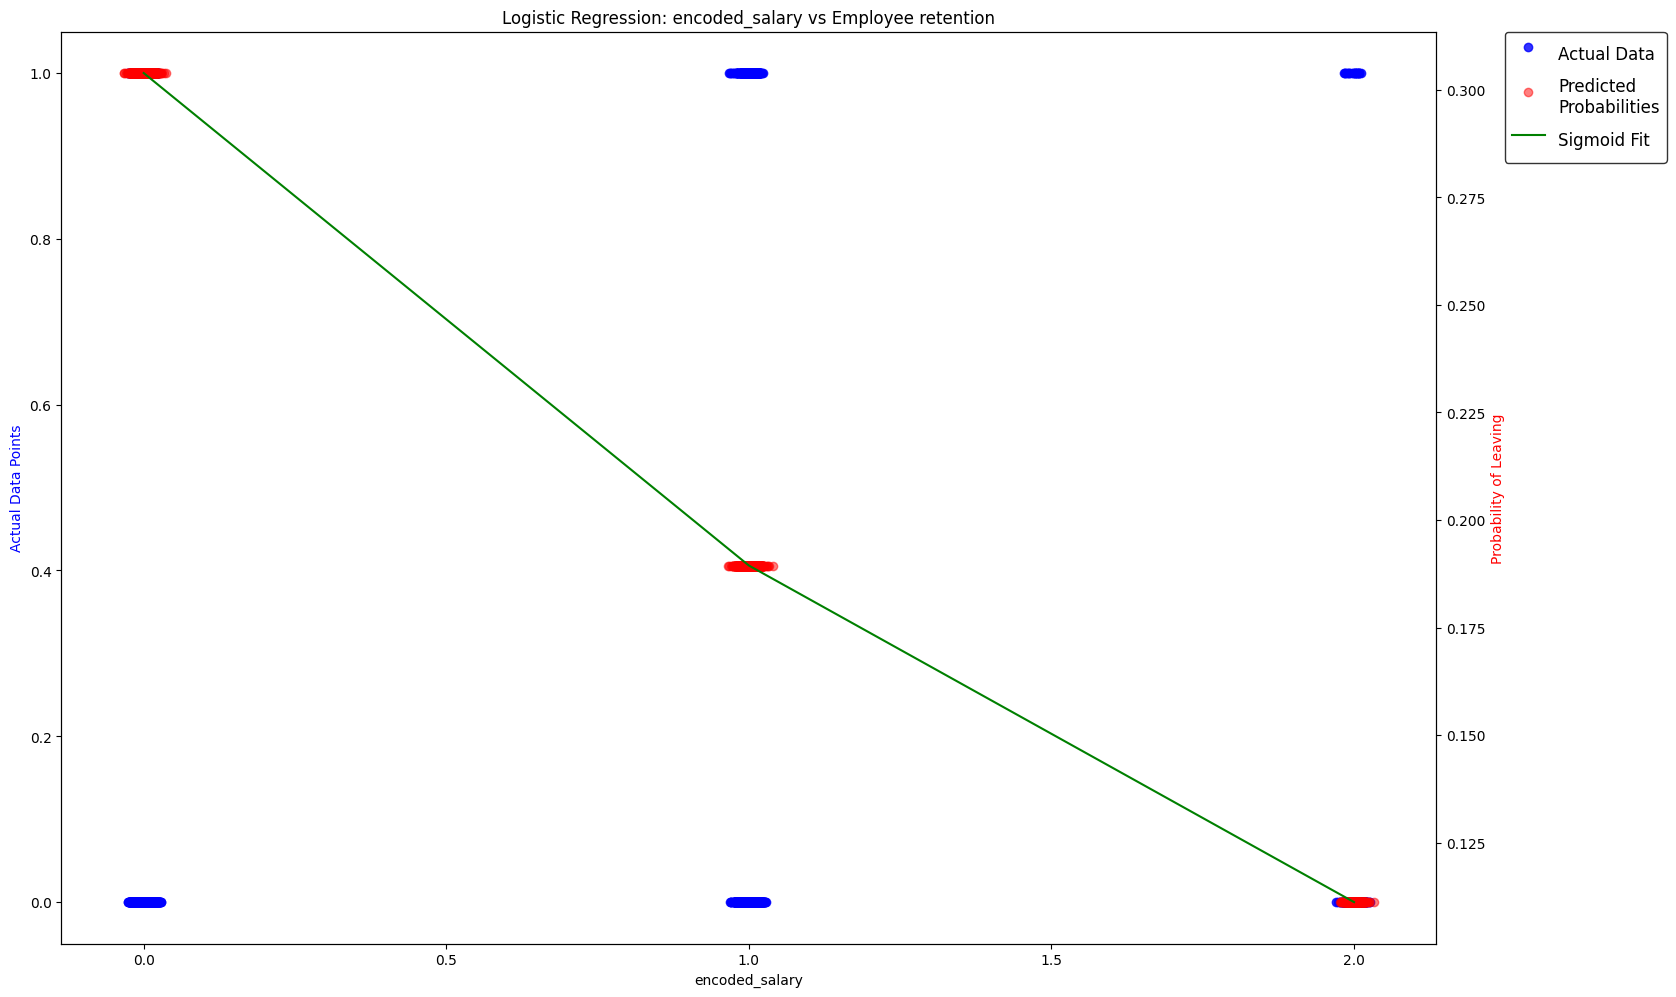

In [333]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split as tts

# Define features and target
features = ['satisfaction_level', 'time_spend_company', 'promotion_last_5years', 'encoded_salary']
target = 'left'

# Split the data
x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

# Function to add jitter
def add_jitter(arr, jitter_amount=0.01):
    return arr + np.random.normal(0, jitter_amount, arr.shape)

# Iterate over each feature
for feature in features:
    # Train the model with the respective feature
    X_train_feature = x_train[[feature]]
    X_test_feature = x_test[[feature]]
    model = LR()
    model.fit(X_train_feature, y_train)
    
    # Predict probabilities using the trained model
    probabilities = model.predict_proba(X_test_feature)[:, 1]  # Take probability of class '1' (left)
    
    # Sorting for smooth sigmoid curve
    sorted_indices = np.argsort(X_test_feature[feature].values.flatten())
    
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 8))
    
    # Plot actual data points on the primary y-axis with transparency and jitter
    ax1.scatter(add_jitter(X_test_feature[feature].values.flatten()), y_test, alpha=0.8, label="Actual Data", color='blue')
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Actual Data Points", color='blue')
    
    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.scatter(add_jitter(X_test_feature[feature].values.flatten()), probabilities, alpha=0.5, label="Predicted\nProbabilities", color='red')
    ax2.plot(X_test_feature[feature].values.flatten()[sorted_indices], probabilities[sorted_indices], color='green', label="Sigmoid Fit")
    ax2.set_ylabel("Probability of Leaving", color='red')
    
    # Add title
    plt.title(f"Logistic Regression: {feature} vs Employee retention")

    # Adjust legend box size & position
    legend = fig.legend(
        loc='upper left',
        bbox_to_anchor=(1.05, 1),  # Moves legend to the right in a vertical format
        bbox_transform=ax1.transAxes,  # Keeps legend inside the axes area
        ncol=1,  # Keeps it vertically stacked
        fontsize=12,
        frameon=True,  # Adds a border around the legend
        handleheight=2.5,  # Increases space between legend items
        borderaxespad=0  # Reduces unnecessary padding
    )
    
    legend.get_frame().set_edgecolor('black')  # Optional: Add border to legend

    # Adjust space on the right for the legend box
    plt.subplots_adjust(right=1.5, top=1.25)

    plt.show()


In [340]:
import numpy as np
import plotly.graph_objects as go

features = ['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'encoded_salary']
target = 'left'
x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)
# Ensure that the features used for prediction match those used during training
x_test_features = x_test[features]
model = LR()
model.fit(x_train, y_train)

# Select two features for 3D visualization
feature_x = 'satisfaction_level'
feature_y = 'time_spend_company'

# Create a grid of values for the selected features
x_range = np.linspace(df[feature_x].min(), df[feature_x].max(), 50)
y_range = np.linspace(df[feature_y].min(), df[feature_y].max(), 50)
xx, yy = np.meshgrid(x_range, y_range)

# Prepare feature matrix for prediction
grid_points = np.c_[xx.ravel(), yy.ravel(), 
                    np.full(xx.ravel().shape, df['Work_accident'].median()), 
                    np.full(xx.ravel().shape, df['promotion_last_5years'].median()), 
                    np.full(xx.ravel().shape, df['encoded_salary'].median())]

# Predict probability of leaving for grid points
zz = model.predict_proba(grid_points)[:, 1].reshape(xx.shape)

# Create interactive 3D surface plot with Plotly
fig = go.Figure(data=[go.Surface(z=zz, x=xx, y=yy, colorscale='viridis')])

# Update layout for better visualization
fig.update_layout(
    title="Interactive 3D Decision Surface",
    scene=dict(
        xaxis_title=feature_x,
        yaxis_title=feature_y,
        zaxis_title="Probability of Leaving"
    ),
    width=1200,  # Increase the width of the plot
    height=1000   # Increase the height of the plot
)

# Show interactive plot
fig.show()


c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



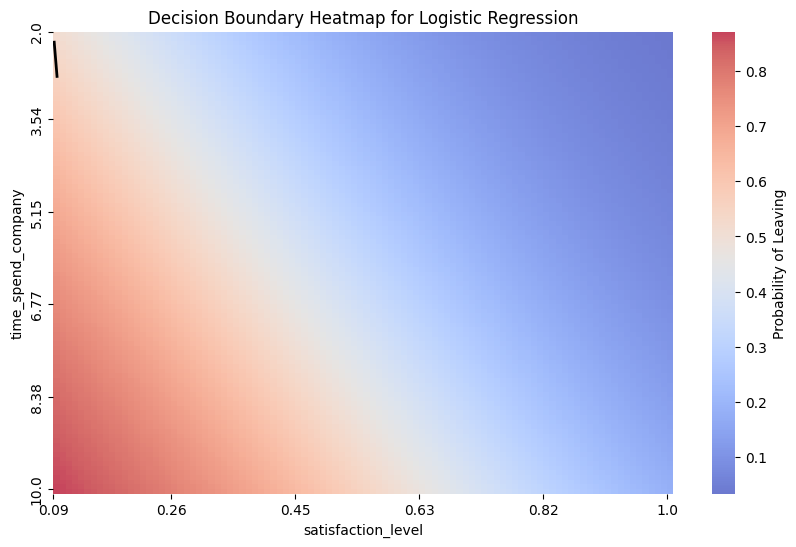

In [ ]:
# Define the number of ticks to display on each axis
from pyautogui import resolution


num_ticks = 6  # Adjust for better readability

# Create a heatmap with proper tick labels
plt.figure(figsize=(10, 6))
ax = sns.heatmap(zz, cmap="coolwarm", xticklabels=num_ticks, yticklabels=num_ticks, cbar=True, 
                 cbar_kws={'label': 'Probability of Leaving'}, alpha=0.75)

# Set tick positions and labels manually
x_tick_positions = np.linspace(0, resolution - 1, num_ticks).astype(int)
y_tick_positions = np.linspace(0, resolution - 1, num_ticks).astype(int)

ax.set_xticks(x_tick_positions)
ax.set_yticks(y_tick_positions)

ax.set_xticklabels(np.round(x_range[x_tick_positions], 2))
ax.set_yticklabels(np.round(y_range[y_tick_positions], 2))

# Overlay decision boundary contour
plt.contour(xx, yy, zz, levels=[0.5], colors='black', linewidths=2)

# Labels and title
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Decision Boundary Heatmap for Logistic Regression")

# Show plot
plt.show()


